In [1]:
from sparsity_util import read_sparsity_info
import numpy as np

# Read SparsityInfo from file

In [2]:
b = read_sparsity_info('block9_attn_sft_qk')

In [3]:
np.average(b.avg)

0.3375180907349671

In [4]:
b.shape

(6, 197, 197)

In [5]:
b1 = b.slice_batch(1, 128)
b2 = b.slice_batch(128, 256)

# Visualize

In [6]:
%matplotlib notebook

from sparsity_util import SparsityMap3D, SparsityMap2D, SparsityMap1D

In [7]:
b1_map = SparsityMap3D(b1.avg, labels=b.dims)
b2_map = SparsityMap3D(b2.avg, labels=b.dims)

<IPython.core.display.Javascript object>


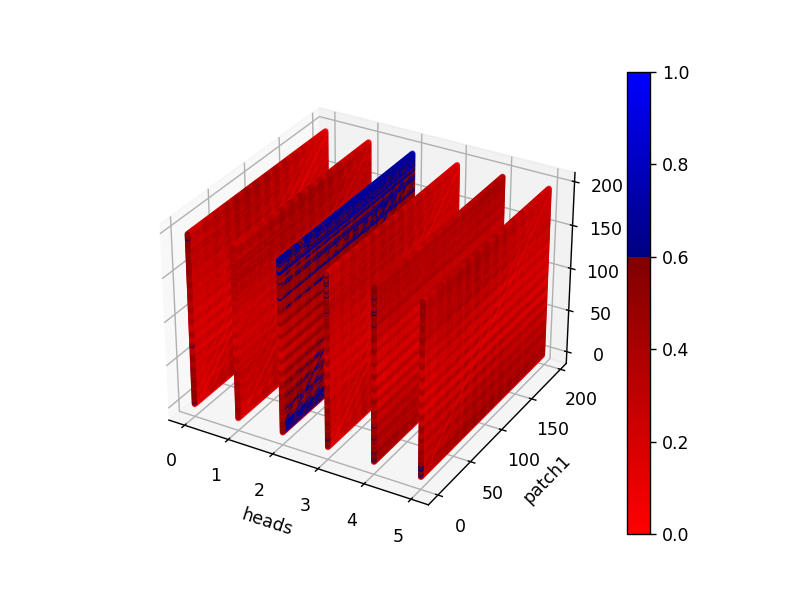

In [8]:
b1_map.draw()

<IPython.core.display.Javascript object>


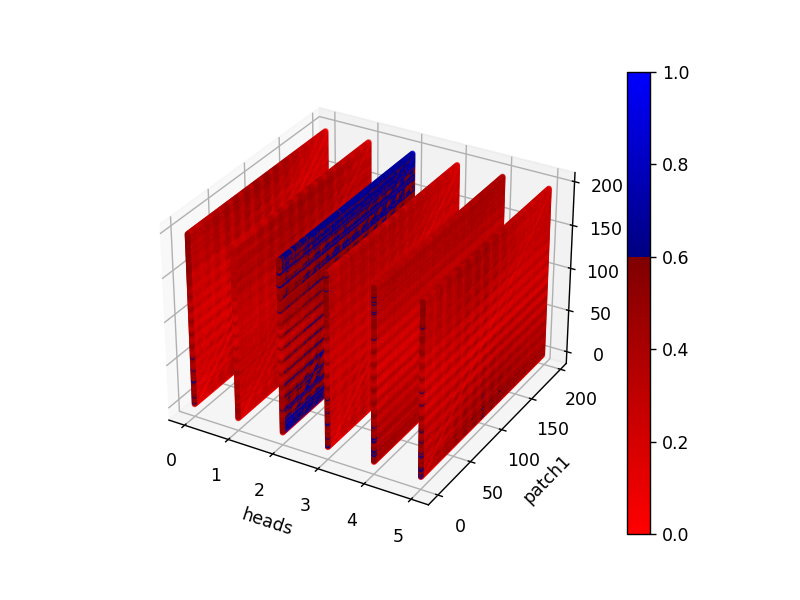

In [9]:
b2_map.draw()

# Sparsity Data on Heads

In [10]:
channel_avg1 = SparsityMap1D(b.slice_batch(0,128).group_by('heads').avg - np.sqrt(b.slice_batch(0,128).group_by('heads').std_var), labels=['heads',])
channel_avg2 = SparsityMap1D(b.slice_batch(128,256).group_by('heads').avg, labels=['heads'])

In [11]:
channel_avg1.sparsity_tensor

array([-0.00837062, -0.02731945,  0.11862863, -0.00169623, -0.0554723 ,
       -0.03252639])

<IPython.core.display.Javascript object>


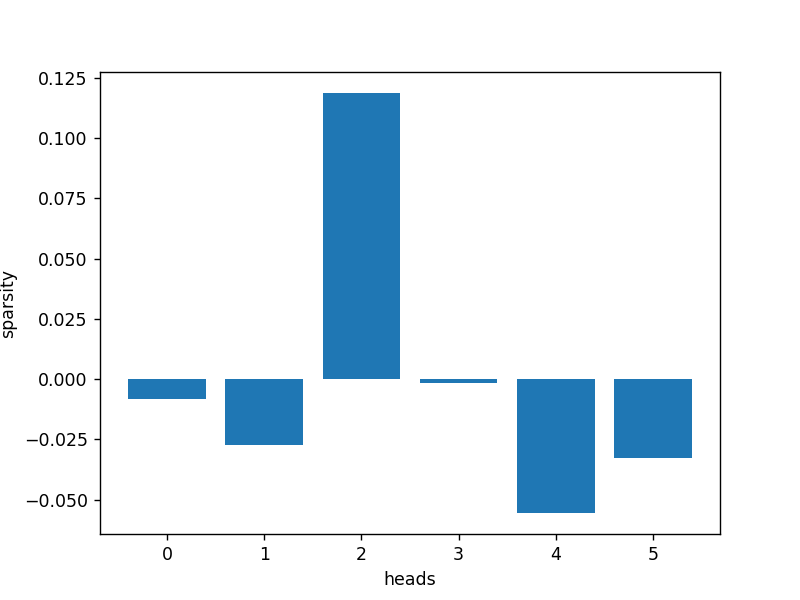

In [12]:
channel_avg1.draw()

<IPython.core.display.Javascript object>


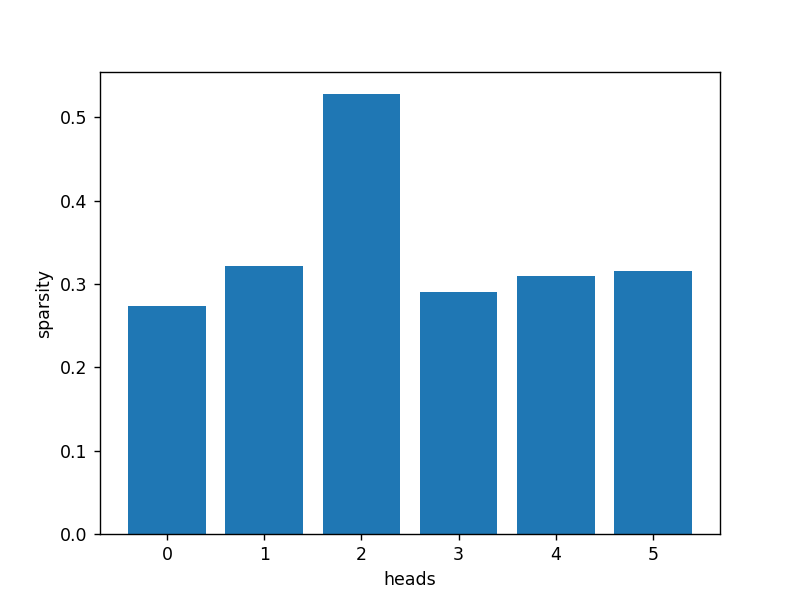

In [13]:
channel_avg2.draw()

# Tile in Height/Width Dim

In [18]:
bh4 = SparsityMap2D(b.avg[2], labels=['patch1', 'patch2'])

<IPython.core.display.Javascript object>


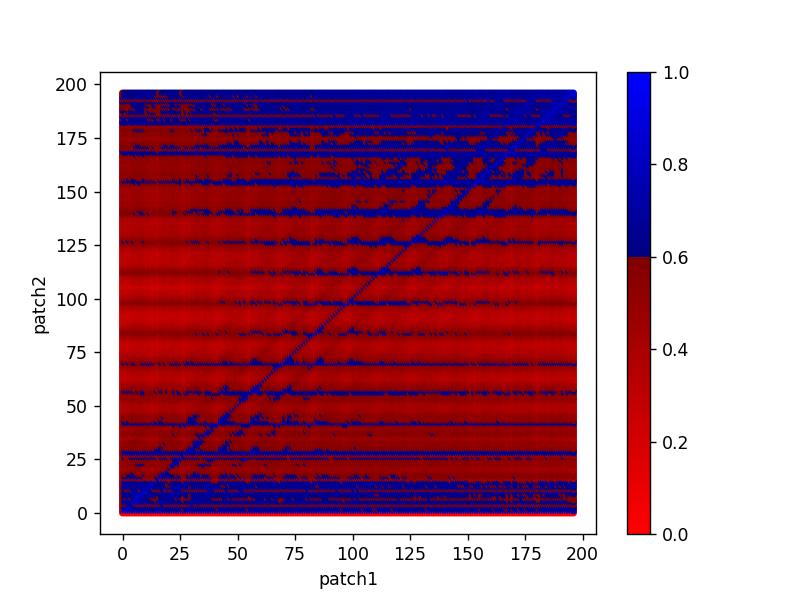

<IPython.core.display.Javascript object>


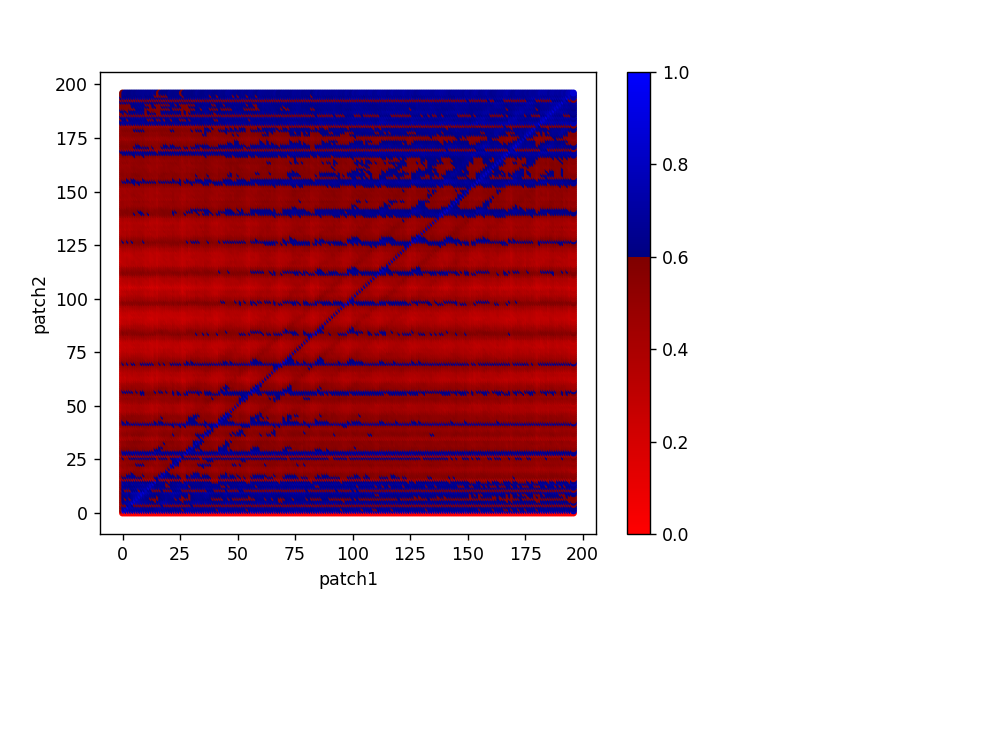

In [19]:
bh4.draw()

# Weight Analysis